In [47]:
import os
import os.path as osp
from glob import glob
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from pylab import rcParams
import json

rcParams['figure.figsize'] = 8, 5

In [31]:
train = pd.read_json('../data/train.json')
val = pd.read_json('../data/val.json')
mapping = json.load(open('../data/class-mapper.json'))

train.head()

,name,lead,label,filename,path
0,100,V5,N,55343,/home/xperience/hse/graduate/code/data/2D/100/...
1,100,V5,N,208548,/home/xperience/hse/graduate/code/data/2D/100/...
2,100,V5,N,236927,/home/xperience/hse/graduate/code/data/2D/100/...
3,100,V5,N,165499,/home/xperience/hse/graduate/code/data/2D/100/...
4,100,V5,N,129230,/home/xperience/hse/graduate/code/data/2D/100/...


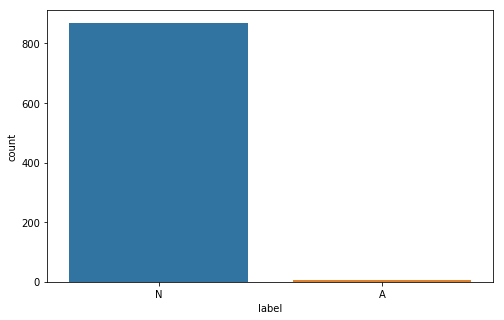

In [28]:
sns.countplot(train['label'], order = train['label'].value_counts().index)

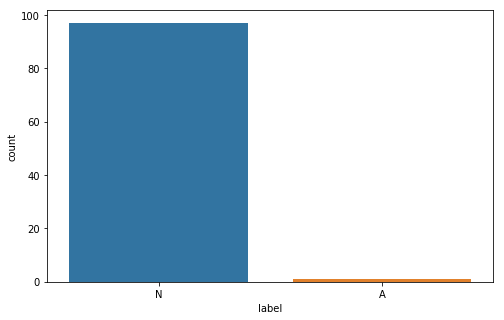

In [29]:
sns.countplot(val['label'], order = val['label'].value_counts().index)

In [24]:
a = 1 / train['label'].value_counts()
a = a / sum(a)
a

N    0.005721
A    0.994279
Name: label, dtype: float64

In [35]:
mapping

{'N': 0, 'L': 1, 'A': 2, 'R': 3, 'V': 4, '\\': 5, '!': 6, 'E': 7}

In [38]:
import numpy as np
weights = np.zeros(len(mapping))
for i in a.index:
    weights[mapping[i]] = a[i]

In [39]:
weights

array([0.00572082, 0.        , 0.99427918, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

# Visualization

In [55]:
import wfdb
import matplotlib.pyplot as plt
from PIL import Image

In [51]:
ecg_data = sorted([osp.splitext(i)[0] for i in glob('../mit-bih/*.atr')])

In [52]:
ecg = ecg_data[0]
record = rdrecord(ecg)
ann = wfdb.rdann(ecg, extension='atr')

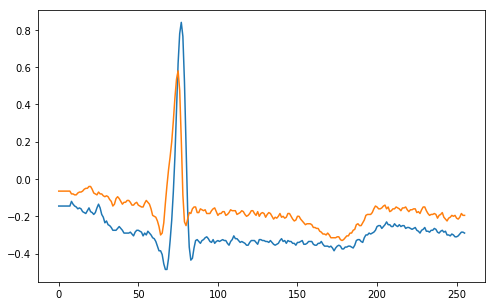

In [53]:
plt.plot(record.p_signal[0:256])

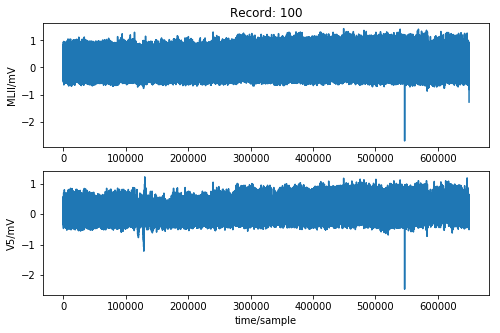

In [54]:
wfdb.plot_wfdb(record)

In [88]:
Normal = [np.array(Image.open(i)) for i in glob('../data/2D/100/MLII/N/*.png')[:9]]
A = [np.array(Image.open(i)) for i in glob('../data/2D/100/MLII/A/*.png')[:9]]

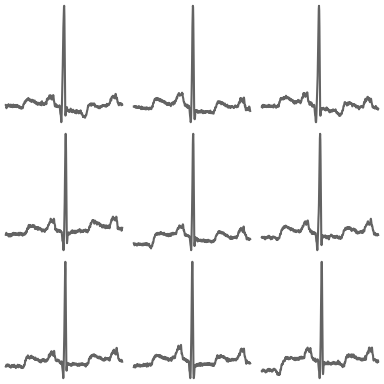

In [89]:
Image.fromarray(np.vstack( [np.hstack(Normal[i::3]) for i in range(0,3)] ))

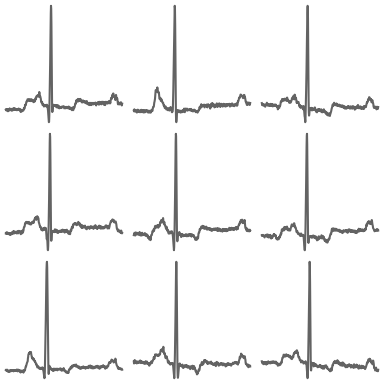

In [90]:
Image.fromarray(np.vstack( [np.hstack(A[i::3]) for i in range(0,3)] ))